In [122]:

import nltk
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from IPython import display
import praw


#what is my project. Im going to create a tracker that tells me the most controversial topics in real time
reddit = praw.Reddit (
    client_id="x6kDfhzIfzBSEH9nhGf-Hw",
    client_secret="krBRoDQYgOYkHITZDGM41PYMHqlMwg",
     user_agent="Scraper 1.0 by /u/WillCCUBC" )

sns.set(style='darkgrid',context='talk',palette="Dark2")

headlines = set()
set_of_comments=set()
counter=0
comment_counter=0
for submission in reddit.subreddit('ubc').controversial(limit=None):
    if  1641024000 <submission.created_utc<1672560000  :
        counter=counter+1
        headlines.add(submission.title)
        headlines.add(submission.selftext)
    #for comment in submission.comments:
        #comment_counter=comment_counter+1
        #print(comment_counter)
        #print(comment.body.encode("utf-8", errors='ignore'))
        #headlines.add(comment.body.encode(errors='ignore'))
print("total posts:",counter)    
print(len(headlines))  
#headlines.add("I LOVE UBC FOREVER")## Token positive comment
df = pd.DataFrame(headlines)
#df.to_csv('headlines.csv',header=False,index=False)

df.head()
#df.to_csv('headlines.txt',header=False,encoding='utf-8',index=False)
#df = pd.DataFrame(set_of_comments)
#df.to_csv('comments.txt',header=False,encoding='utf-8',index=False)




total posts: 224
404


,0
0,
1,How are we just going back to in-person if stu...
2,Outrageous
3,AC in the gyms esp Birdcoop
4,My prof just decided to not mark my assignment...


In [123]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
#nltk.download('vader_lexicon')

sia= SIA()
results =[]
for line in headlines:
    scores =sia.polarity_scores(line)
    scores['headline']=line
    results.append(scores)

pprint(results[:3],width=100)


[{'compound': 0.0, 'headline': '', 'neg': 0.0, 'neu': 0.0, 'pos': 0.0},
 {'compound': 0.0,
  'headline': 'How are we just going back to in-person if students in greeklife are holding '
              'superspreader events?',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': -0.4588, 'headline': 'Outrageous', 'neg': 1.0, 'neu': 0.0, 'pos': 0.0}]


In [124]:
df=pd.DataFrame.from_records(results)
df.head()
df.to_csv('results.csv',header=False,encoding='utf-8',index=False)

df['label']=0
df.loc[df['compound']>0.2,'label']=1
df.loc[df['compound']<-0.2,'label']=-1
df.head()


,neg,neu,pos,compound,headline,label
0,0.0,0.0,0.0,0.0000,,0
1,0.0,1.0,0.0,0.0000,How are we just going back to in-person if stu...,0
2,1.0,0.0,0.0,-0.4588,Outrageous,-1
3,0.0,1.0,0.0,0.0000,AC in the gyms esp Birdcoop,0
4,0.0,1.0,0.0,0.0000,My prof just decided to not mark my assignment...,0


In [125]:


df.to_csv('After_Label_results.csv',header=False,encoding='utf-8',index=False)

df2=df[['headline','label']]
df2.to_csv('reddit_headlines_labels.csv',encoding='utf-8',index=False)
df.label.value_counts()

 0    174
 1    130
-1    100
Name: label, dtype: int64

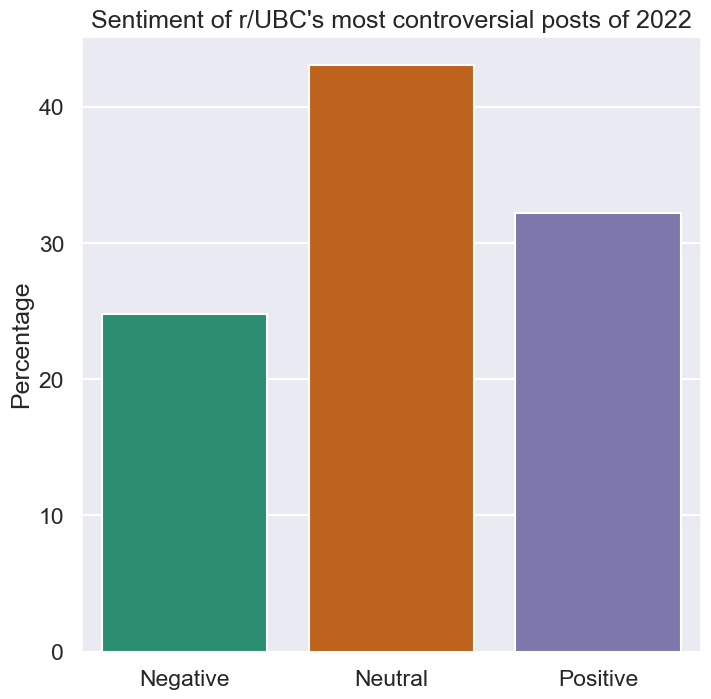

In [128]:

temp=df.label.value_counts(normalize=True)*100
temp.to_csv('Temp_results.csv',header=False,encoding='utf-8',index=False)

fig, ax=plt.subplots(figsize=(8,8))
counts=df.label.value_counts(normalize=True)*100
sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative','Neutral','Positive'])
ax.set_ylabel("Percentage")
plt.title("Sentiment of r/UBC's most controversial posts of 2022")
plt.show()
